# Phishing Detection Feature Engineering

This notebook will create, visualize and explain some of the thinking behind the feature engineering.
It will:
- Create a new dataset of features
- Provide visualtizations and basic analysis of the features
- Output this dataset to a .csv file for use in a model

First we import the libraries and data
We are labeling a Phishing url as 1 and a non-phishing as 0

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [49]:
data = pd.read_csv('data/phishing_site_urls.csv')
# data = data[["URL", "Label"]]
#data['URL'] = data['URL'].apply(lambda url: url.replace("https://", "").replace("http://", ""))

data['Label'] = data['Label'].map({'bad': 1, 'good': 0})

# Simple Features

- Number of periods in the URL
  - Multiple subdomains are uncommon amongst legitimate urls.
- Number of slashes
  - Large numbers of slashes to direct you all to long routes is common for Phishing urls
- Length of the URL
  - Common url's have smaller lengths than most Phishing URLs
- Number of numbers in the URL
  - Phishing urls commonly contain numbers this is less common with legitimate urls
- firstdigit
  - Maybe Phishing websites start with digits more often

In [50]:
data['periods'] = data['URL'].apply(lambda url: url.count('.'))
data['slashes'] = data['URL'].apply(lambda url: url.count('/'))
data['doubleSlashes'] = data['URL'].apply(lambda url: url.count('//'))
data['atSymbol'] = data['URL'].apply(lambda url: url.count('@'))
data['length'] = data['URL'].apply(lambda url: len(url))
data['numberCount'] = data['URL'].apply(lambda url: sum(c.isdigit() for c in url))
data['firstdigit'] = data['URL'].apply(lambda url: int(url[0].isdigit()))

data['wLetter'] = data['URL'].apply(lambda url: url.count('w'))
data['vLetter'] = data['URL'].apply(lambda url: url.count('v'))
data['xLetter'] = data['URL'].apply(lambda url: url.count('x'))
data['zLetter'] = data['URL'].apply(lambda url: url.count('z'))
data['jLetter'] = data['URL'].apply(lambda url: url.count('j'))
data['qLetter'] = data['URL'].apply(lambda url: url.count('q'))

# More Advanced and Creative Features
These are features that contain more advanced concepts such as IP addresses or URL domains.

- Contains an IP address
- Number of semicolons
  - Websites can pass information using the pattern ?variable=value;variable2=value2
- Number of domains such of .com, .ca and .net
  - Phishing websites commonly contain many domains

In [51]:
data['IP'] = data['URL'].apply(lambda url: int(re.search('(?:\d{1,3}\.){3}\d{1,3}', url) is not None))
data['semicolon'] = data['URL'].apply(lambda url: url.count(';'))

domains = ['.com', '.net', '.ca', '.html', '.exe', '.xyz', '.php', '.rar']
data["domain"] = data['URL'].apply(lambda url: sum(substring in url for substring in domains))

vowelLetter = ['a', 'e', 'i', 'o', 'u']
data['vowels'] = data['URL'].apply(lambda url: sum(letter in vowelLetter for letter in url))
data['dotService'] = data['URL'].apply(lambda url: url.count('.edu') + url.count('.org'))

data["hash"] = data['URL'].apply(lambda url: int(re.search('[0-9a-f]{64}|[0-9a-f]{32}', url) is not None))
print(data)

                                                      URL  Label  periods  \
0       nobell.it/70ffb52d079109dca5664cce6f317373782/...      1        6   
1       www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...      1        5   
2       serviciosbys.com/paypal.cgi.bin.get-into.herf....      1        7   
3       mail.printakid.com/www.online.americanexpress....      1        6   
4       thewhiskeydregs.com/wp-content/themes/widescre...      1        1   
...                                                   ...    ...      ...   
549341                                    23.227.196.215/      1        3   
549342                                 apple-checker.org/      1        1   
549343                                  apple-iclods.org/      1        1   
549344                                 apple-uptoday.org/      1        1   
549345                                  apple-search.info      1        1   

        slashes  doubleSlashes  atSymbol  length  numberCount  firstdigit  

# Correlation Matrix
Show how these features well these features correlate to the Label

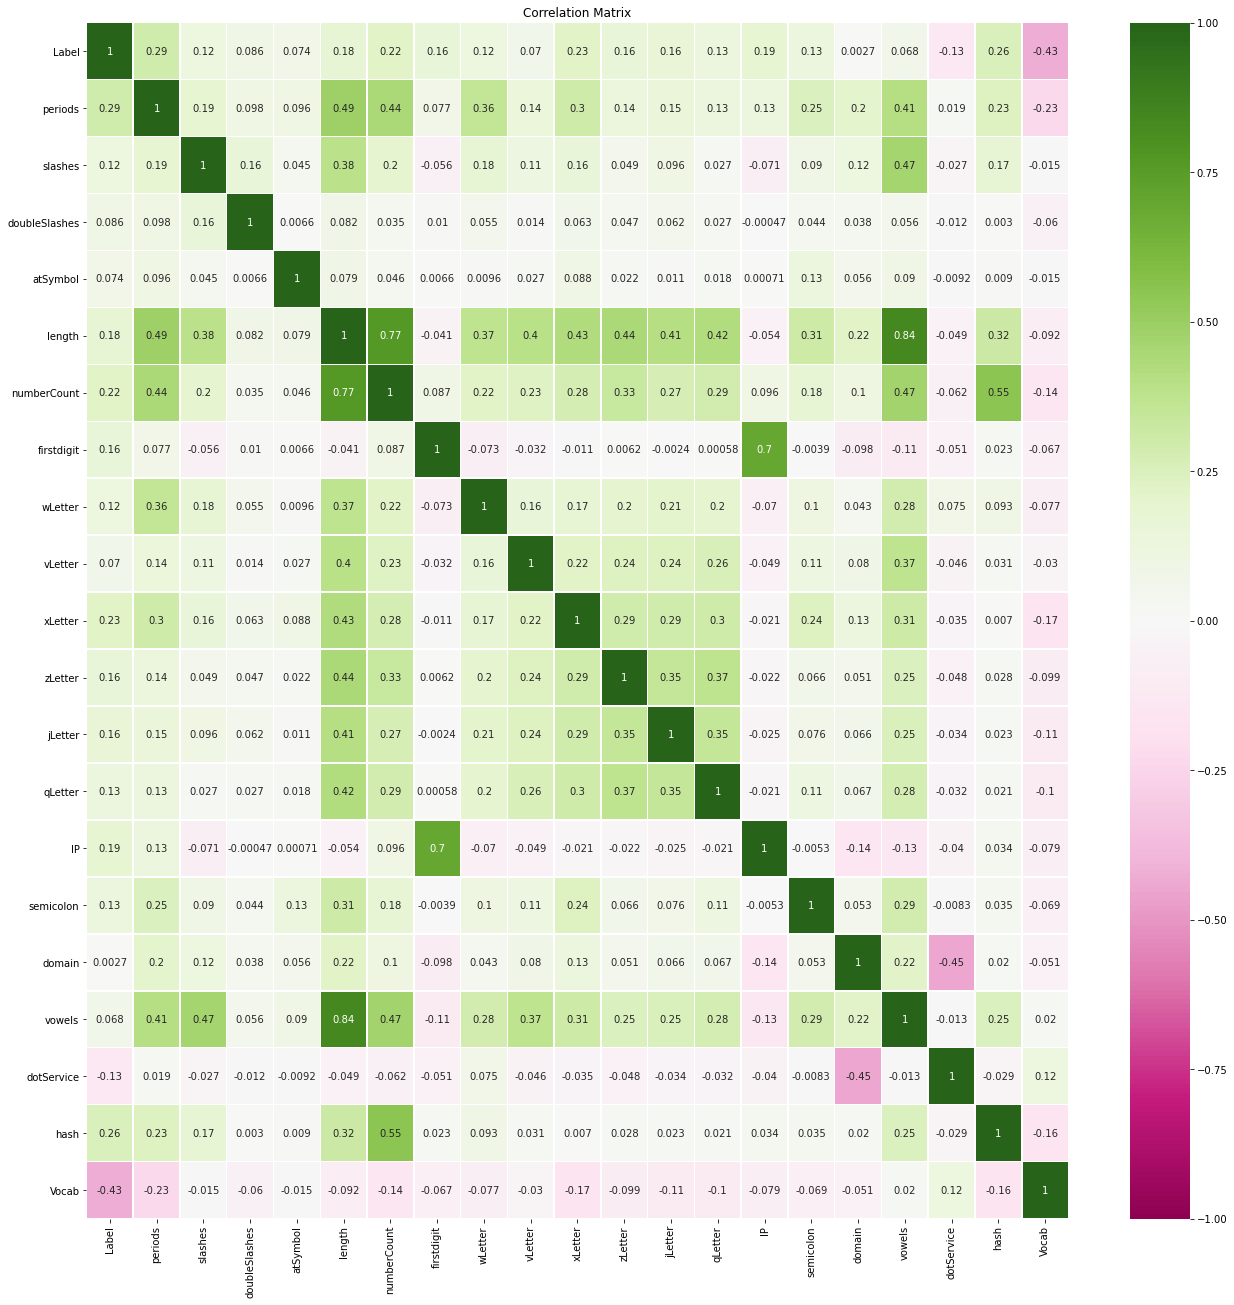

In [52]:
links = pd.read_csv("data/commonString.csv") 
commonWord = links['String']
g1 = links['Good']
t1 = links['Word Count']
def VocabCheck(url):
    # define variables
    goodWordsFound = 0
    badWordsFound = 0
    
    # Run through the list of common words
    for i in range (0,len(commonWord),1):
        if url.find(commonWord[i]) >= 0:
            # if found state whether word is good or bad
            if g1[i] > t1[i] - g1[i]:
                goodWordsFound += 1
            else:
                badWordsFound += 1

    #Determine the final result
    if badWordsFound > 0 and goodWordsFound > 0:
        return 0
    elif goodWordsFound > 0:
        return 1
    elif badWordsFound > 0:
        return -1
    else:
        return 0

data['Vocab'] = data['URL'].apply(VocabCheck)


plt.subplots(figsize=(len(data.columns), len(data.columns)))
sns.heatmap(data.corr(), annot=True, center=0, cmap='PiYG', vmin=-1, vmax=1, linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [53]:
data = data.drop('URL', axis=1)
data.to_csv('data/data_featured.csv')